In [2]:
from fktools import *
import tensorflow as tf
import sklearn

2026-01-16 12:17:59.489208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-16 12:17:59.526196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-16 12:18:00.421533: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/filip/miniconda3/envs/defects/lib/python3.11/site-packages/keras/src/export/tf2onnx_l

In [3]:
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(8,)),
            tf.keras.layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(8, activation='softmax'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


latent_dim = 2
autoencoder = Autoencoder(latent_dim)

I0000 00:00:1768562280.756689   10064 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1222 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [5]:
autoencoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mae',
)

history = autoencoder.fit(
    y_train, y_train,
    epochs=20,
    batch_size=64,
    # validation_split=0.2
)

Epoch 1/20


2026-01-16 12:18:01.715467: I external/local_xla/xla/service/service.cc:163] XLA service 0x736658006b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-16 12:18:01.715478: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-01-16 12:18:01.725419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-16 12:18:01.785455: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701


239/734 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.1421

I0000 00:00:1768562282.410253   18250 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


734/734 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1245 
Epoch 2/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.0740
Epoch 3/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - loss: 0.0576
Epoch 4/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.0531
Epoch 5/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 0.0507
Epoch 6/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 0.0488
Epoch 7/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.0453
Epoch 8/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.0387
Epoch 9/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - loss: 0.0341
Epoch 10/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - loss: 0.0303
Epoch 11/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - loss: 0.0274
Epoch 12/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 0.0255
Epoch 13/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.0242
Epoch 14/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.0233
Epoch 15/20
734/734 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

/tmp/ipykernel_10064/88168614.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


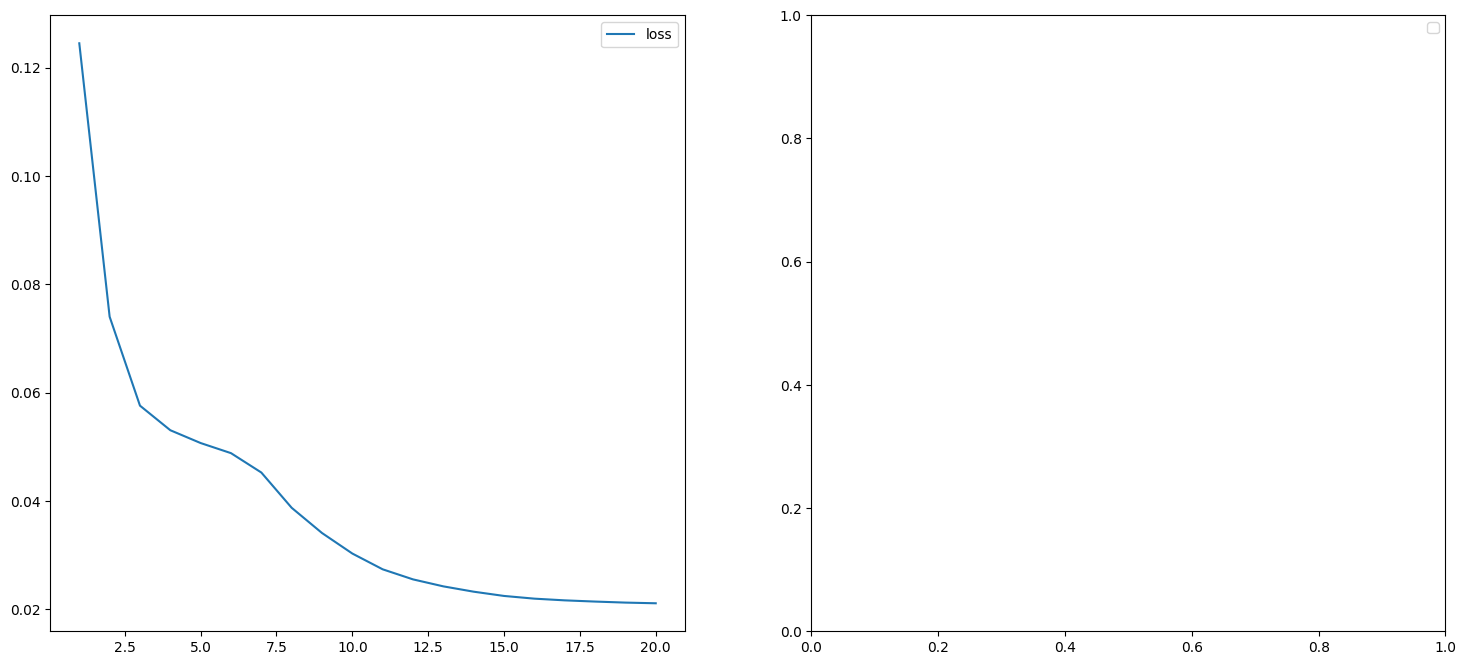

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].legend()
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


<BarContainer object of 8 artists>

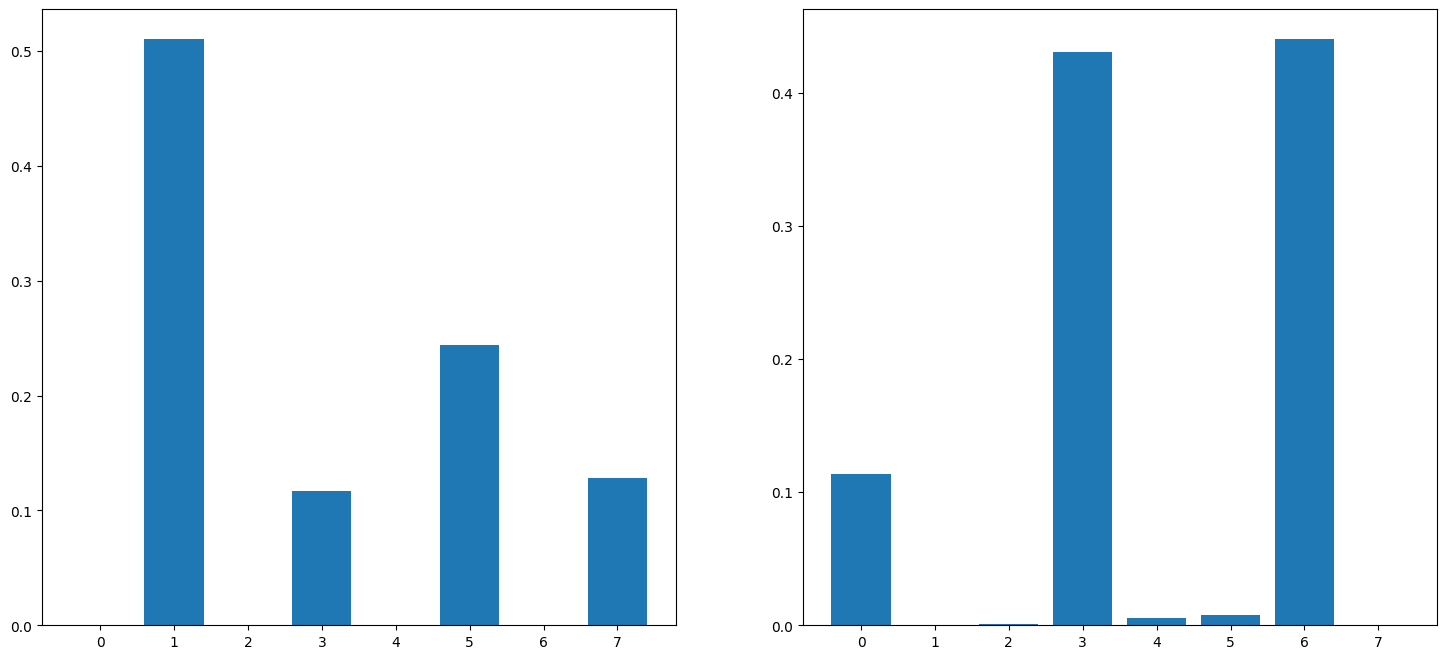

In [8]:
i = 2

pred = autoencoder.predict(np.array([X_test[i]]))[0]

fig, ax = plt.subplots(ncols=2, figsize=(18,8))

ax[0].bar(np.arange(8), y_test[i])
ax[1].bar(np.arange(8), pred)

[[0.77100503 3.802803  ]
 [5.180816   0.9067508 ]
 [0.26055098 3.5575237 ]
 ...
 [5.930641   0.8392519 ]
 [1.2786474  3.851286  ]
 [1.5588168  5.2791567 ]]


Text(0.5, 1.0, 'autoencoder 8-2-8, encoded points, wihout noise')

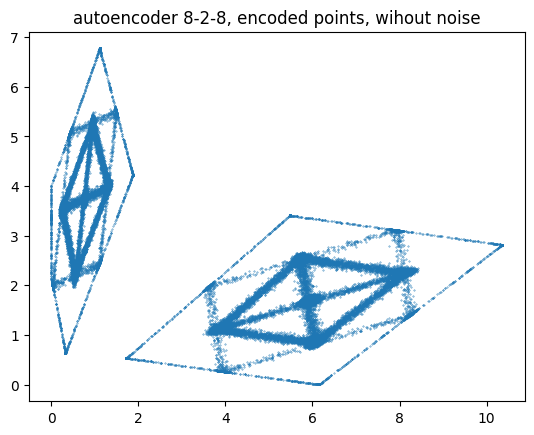

In [9]:
encoded_points = np.array(autoencoder.encoder(y))

print(encoded_points)

plt.scatter(encoded_points[:,0], encoded_points[:,1],s=0.1)
plt.title("autoencoder 8-2-8, encoded points, wihout noise")